In [115]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
from fastai.vision.all import *
from fastai.data.all import *
from fastai.imports import *
from fastai.vision.core import *
from fastai import metrics
import scipy
from scipy import ndimage

In [4]:
def get_tuple_files(path):
    files = get_image_files(path)
    files = files.filter(lambda f: f.name.endswith('vhr.tif'),negate=False)
    return files


In [5]:
def label_func(x):
      return str(x.parents[0]/x.stem[0:23])+"_mask_build.tif";

In [6]:
model_build= load_learner(Path('/content/drive/My Drive/patch-build.pkl'),cpu = True)

model_flood= load_learner(Path('/content/drive/My Drive/patch-flooded.pkl'),cpu = True)


# **PREDICTIONS**

In [110]:
im=PILImage.create("/content/drive/My Drive/E246000N3305300UTM15R/vhr.tif")
mask1=PILMask.create("/content/drive/My Drive/E246000N3305300UTM15R/buildings1m.tif")
mask2=PILMask.create("/content/drive/My Drive/E246000N3305300UTM15R/flooded1m.tif")

In [111]:
  z=im.reshape(1024,1024,resample=Image.BICUBIC)

  z=image2tensor(z)
  z1=z[:,0:512,0:512]
  z2=z[:,0:512,512:1024]
  z3=z[:,512:1024,0:512]
  z4=z[:,512:1024,512:1024]

  z1=z1.permute((1,2,0))
  z2=z2.permute((1,2,0))
  z3=z3.permute((1,2,0))
  z4=z4.permute((1,2,0))

  im1=PILImage.create(z1.cpu().numpy())
  im2=PILImage.create(z2.cpu().numpy())
  im3=PILImage.create(z3.cpu().numpy())
  im4=PILImage.create(z4.cpu().numpy())

In [112]:
x1=torch.cat([model_build.predict(im1)[0],model_build.predict(im2)[0]],dim=1)
x2=torch.cat([model_build.predict(im3)[0],model_build.predict(im4)[0]],dim=1)
x=torch.cat([x1,x2],dim=0)

In [113]:
y1=torch.cat([model_flood.predict(im1)[0],model_flood.predict(im2)[0]],dim=1)
y2=torch.cat([model_flood.predict(im3)[0],model_flood.predict(im4)[0]],dim=1)
y=torch.cat([y1,y2],dim=0)

Text(0.5, 1.0, 'VHR Image')

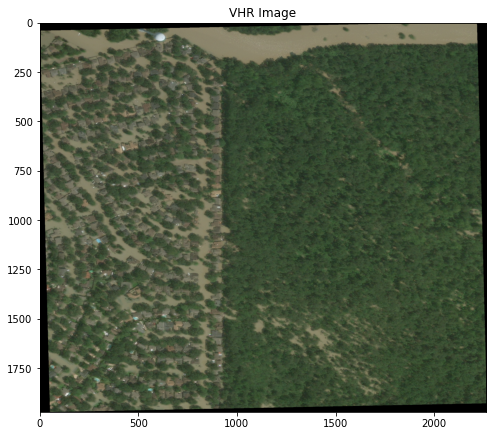

In [114]:
fig, axarr = plt.subplots(1,1, figsize=(8,8), sharex=True, sharey=True)
axarr.imshow(im)
axarr.set_title(f'VHR Image')

Text(0.5, 1.0, 'Flood Damage Mask Prediction')

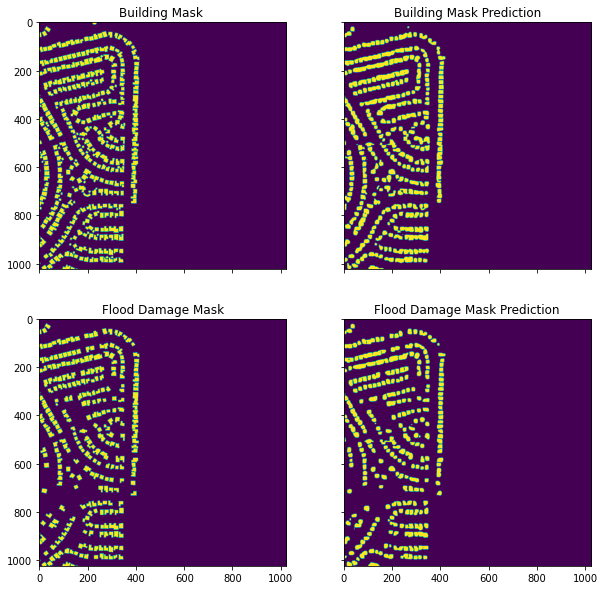

In [115]:
fig, axarr = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)


axarr[0][0].imshow(mask1.reshape(1024,1024,resample=3))
axarr[0][0].set_title(f'Building Mask ')


axarr[0][1].imshow(x)
axarr[0][1].set_title(f'Building Mask Prediction')

axarr[1][0].imshow(mask2.reshape(1024,1024,resample=3))
axarr[1][0].set_title(f'Flood Damage Mask')


axarr[1][1].imshow(y)
axarr[1][1].set_title(f'Flood Damage Mask Prediction')





# **SIMPLE UI**

In [85]:
up=fastbook.widgets.FileUpload()
up

FileUpload(value={}, description='Upload')

In [92]:
out=fastbook.widgets.Output()
bt_in=fastbook.widgets.Button(description="Input")
bt=fastbook.widgets.Button(description="Segment")
bt_fld=fastbook.widgets.Button(description="Damaged Segment")


In [94]:
def on_click_input(change):
  
  
    out.clear_output() 
    im=PILImage.create(up.data[-1])
    plt.imshow(im)
    
    
    
  

bt_in.on_click(on_click_input)

def on_click_flood(change):
    print("DAMAGED BUILDINGS")
    im=PILImage.create(up.data[-1])
    
    
    z=im.reshape(1024,1024,resample=Image.BICUBIC)

    z=image2tensor(z)
    z1=z[:,0:512,0:512]
    z2=z[:,0:512,512:1024]
    z3=z[:,512:1024,0:512]
    z4=z[:,512:1024,512:1024]

    z1=z1.permute((1,2,0))
    z2=z2.permute((1,2,0))
    z3=z3.permute((1,2,0))
    z4=z4.permute((1,2,0))

    im1=PILImage.create(z1.cpu().numpy())
    im2=PILImage.create(z2.cpu().numpy())
    im3=PILImage.create(z3.cpu().numpy())
    im4=PILImage.create(z4.cpu().numpy())
    y1=torch.cat([model_flood.predict(im1)[0],model_flood.predict(im2)[0]],dim=1)
    y2=torch.cat([model_flood.predict(im3)[0],model_flood.predict(im4)[0]],dim=1)
    y=torch.cat([y1,y2],dim=0)
    plt.imshow(y)

bt_fld.on_click(on_click_flood)


def on_click_segmen(change):
    print("BUILDINGS")
    im=PILImage.create(up.data[-1])
    
    
    z=im.reshape(1024,1024,resample=Image.BICUBIC)

    z=image2tensor(z)
    z1=z[:,0:512,0:512]
    z2=z[:,0:512,512:1024]
    z3=z[:,512:1024,0:512]
    z4=z[:,512:1024,512:1024]

    z1=z1.permute((1,2,0))
    z2=z2.permute((1,2,0))
    z3=z3.permute((1,2,0))
    z4=z4.permute((1,2,0))

    im1=PILImage.create(z1.cpu().numpy())
    im2=PILImage.create(z2.cpu().numpy())
    im3=PILImage.create(z3.cpu().numpy())
    im4=PILImage.create(z4.cpu().numpy())
    x1=torch.cat([model_build.predict(im1)[0],model_build.predict(im2)[0]],dim=1)
    x2=torch.cat([model_build.predict(im3)[0],model_build.predict(im4)[0]],dim=1)
    x=torch.cat([x1,x2],dim=0)
    plt.imshow(x)

bt.on_click(on_click_segmen) 

In [95]:
lb_ch=fastbook.widgets.Label(value="Choose Image File")

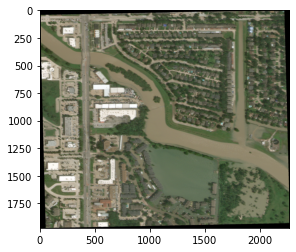

BUILDINGS


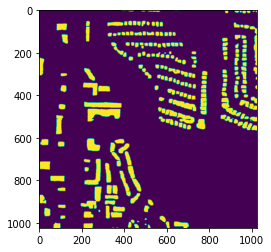

DAMAGED BUILDINGS


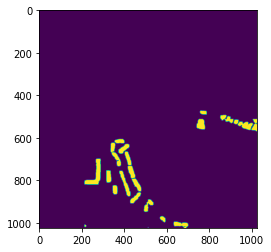

In [108]:
fastbook.widgets.VBox([fastbook.widgets.Label('Select the map image'),up,bt_in,bt,bt_fld,lb_ch])